Implementation of the following algorithm to compute matrix multiplication.

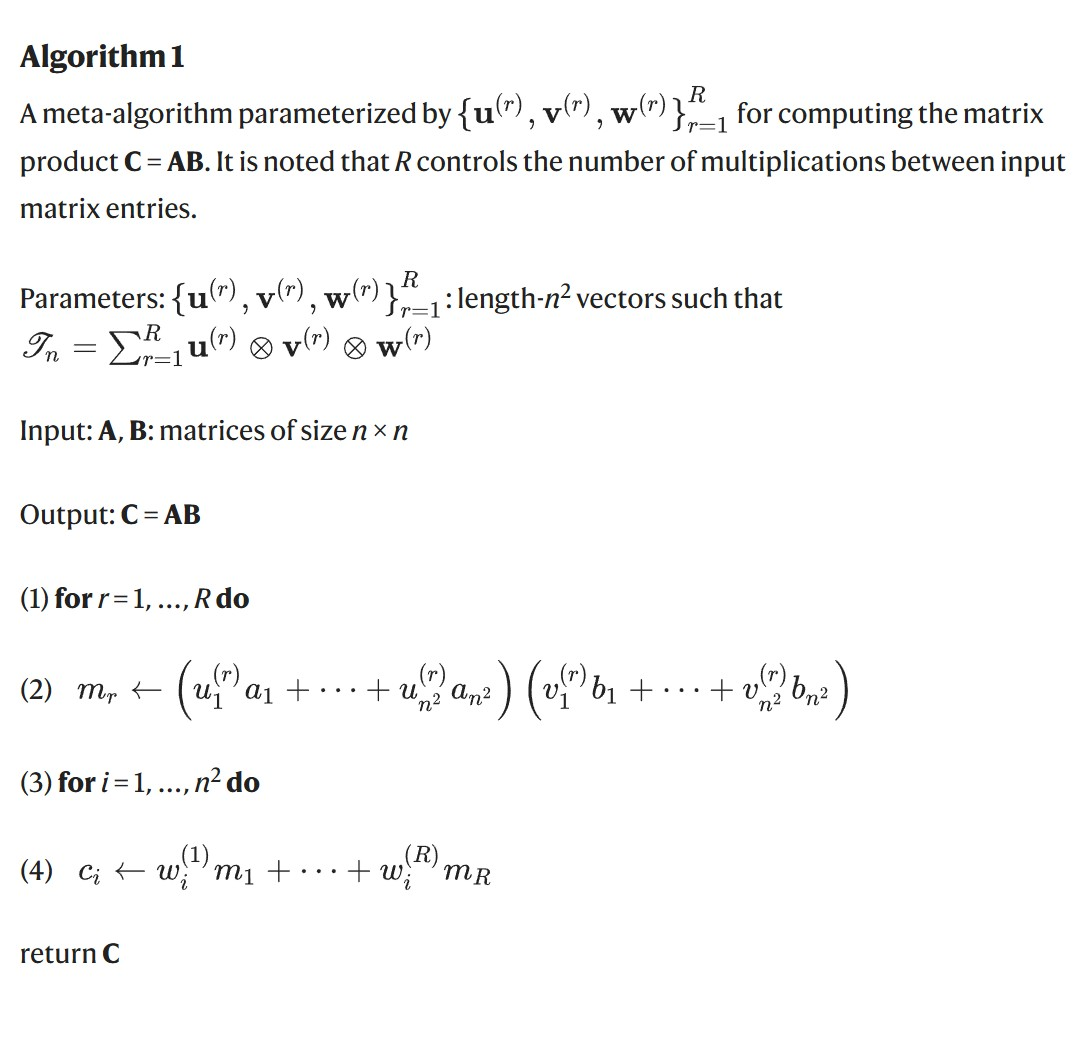

In [22]:
import numpy as np

def matrix_multiplication_meta_algorithm_complex(A_matrix: np.ndarray,
                                                 B_matrix: np.ndarray,
                                                 U_param: np.ndarray,
                                                 V_param: np.ndarray,
                                                 W_param: np.ndarray) -> np.ndarray:
    """
    Implements Algorithm 1 for matrix multiplication C = AB, handling complex numbers.

    The algorithm is parameterized by {u^(r), v^(r), w^(r)}_{r=1 to R}.
    Each u^(r), v^(r), w^(r) is a vector of length n^2.
    U_param, V_param, W_param are matrices where columns are u^(r), v^(r), w^(r) respectively.
    So, U_param, V_param, W_param have dimensions (n^2, R).
    All input matrices and parameters can be complex.

    Args:
        A_matrix (np.ndarray): Input matrix A of size n x n (can be complex).
        B_matrix (np.ndarray): Input matrix B of size n x n (can be complex).
        U_param (np.ndarray): Parameter matrix U of size n^2 x R (can be complex).
        V_param (np.ndarray): Parameter matrix V of size n^2 x R (can be complex).
        W_param (np.ndarray): Parameter matrix W of size n^2 x R (can be complex).

    Returns:
        np.ndarray: Output matrix C computed by the algorithm (will be complex).
    """

    n = A_matrix.shape[0]
    if A_matrix.shape != (n, n) or B_matrix.shape != (n, n):
        raise ValueError("Input matrices A and B must be square and of the same size.")

    n_squared = n * n

    # Validate U, V, W dimensions: (n^2, R)
    if U_param.shape[0] != n_squared or V_param.shape[0] != n_squared or W_param.shape[0] != n_squared:
        raise ValueError(f"U_param, V_param, W_param must have n^2 = {n_squared} rows.")
    if not (U_param.shape[1] == V_param.shape[1] == W_param.shape[1]):
        raise ValueError("U_param, V_param, W_param must have the same number of columns (R).")

    R_val = U_param.shape[1]

    # --- Convert inputs to complex type to ensure complex arithmetic ---
    # It's good practice to handle cases where inputs might be real but computation needs complex.
    A_matrix_complex = A_matrix.astype(complex)
    B_matrix_complex = B_matrix.astype(complex)
    U_param_complex = U_param.astype(complex)
    V_param_complex = V_param.astype(complex)
    W_param_complex = W_param.astype(complex)

    # --- Step 1: Compute A_flat and B_flat (complex) ---
    A_flat = A_matrix_complex.flatten()
    B_flat = B_matrix_complex.flatten()

    print(f"Calculated A_flat (complex, elements a_1 to a_{n_squared}):\n{A_flat}\n")
    print(f"Calculated B_flat (complex, elements b_1 to b_{n_squared}):\n{B_flat}\n")

    # --- Step 2: Compute M_array (complex) ---
    # "Then use Array A_flat and Array B_flat to compute M1 to M_R, put them in array M_array"
    # M_array will have R_val elements and must be complex.
    M_array = np.zeros(R_val, dtype=complex) # Initialize M_array for complex numbers

    # Loop for r = 1, ..., R (0-indexed: r_idx = 0, ..., R_val-1)
    for r_idx in range(R_val):
        # u_k^(r) corresponds to U_param_complex[k_idx, r_idx]
        # v_k^(r) corresponds to V_param_complex[k_idx, r_idx]
        # a_k corresponds to A_flat[k_idx] (already complex)
        # b_k corresponds to B_flat[k_idx] (already complex)

        # Calculate term1: (u_1^(r)a_1 + ... + u_{n^2}^(r)a_{n^2})
        # np.dot for complex numbers performs sum(u_i * a_i)
        term1_A = np.dot(U_param_complex[:, r_idx], A_flat)

        # Calculate term2: (v_1^(r)b_1 + ... + v_{n^2}^(r)b_{n^2})
        term2_B = np.dot(V_param_complex[:, r_idx], B_flat)

        M_array[r_idx] = term1_A * term2_B # Multiplication of complex numbers

    print(f"Calculated M_array (complex, elements M_1 to M_{R_val}):\n{M_array}\n")

    # --- Step 3: Compute C_matrix using M_array and W_param (complex) ---
    # C_flat will have n_squared elements and will be complex.

    # C_flat = W_param_complex @ M_array
    # W_param_complex is (n_squared, R_val), M_array is (R_val,) complex.
    # The result of dot product will be complex.
    C_flat = np.dot(W_param_complex, M_array)

    # Reshape flattened C_flat (length n_squared, complex) to C_matrix (n x n, complex)
    #C_matrix = C_flat.reshape((n, n))
    C_matrix = C_flat.reshape((n, n), order='F')

    print(f"Calculated C_flat (complex, elements c_1 to c_{n_squared}):\n{C_flat}\n")
    return C_matrix



Tensor Decomposition created by AlphaEvolve for computing 4x4 matrix. U,V,W is of shape 16x48, 48 representing the number of multiplications needed.

In [23]:
# Data provided by AlphaEvolve
decomposition_444 = (np.array([[ 0.5+0.5j,  0.5+0.5j,  0. +0.j ,  0. -0.5j,  0.5+0.5j,  0. +0.j ,
         0. +0.5j,  0.5+0.5j,  0. -0.5j, -0.5+0.5j, -0.5+0.5j,  0.5+0.j ,
         0. +0.j , -0. +0.j ,  0. +0.5j,  0. +0.j , -0.5+0.j ,  0.5+0.5j,
         0. +0.5j,  0. -0.j ,  0. +0.j ,  0. +0.5j, -0.5-0.5j, -0. +0.j ,
        -0.5+0.j ,  0. +0.j ,  0. +0.j ,  0. -0.5j, -0.5+0.5j,  0.5+0.5j,
        -0. +0.j ,  0.5+0.j , -0. +0.j ,  0.5+0.j ,  0. -0.5j,  0. +0.j ,
        -0. +0.j ,  0.5+0.j ,  0. +0.j , -0.5+0.j , -0.5-0.5j,  0.5-0.5j,
         0.5+0.5j,  0. +0.5j,  0. -0.j , -0.5+0.5j,  0.5-0.5j,  0.5+0.j ],
       [ 0.5+0.5j,  0. +0.j , -0.5+0.j , -0.5+0.j , -0.5-0.5j,  0. +0.j ,
         0. +0.j , -0.5-0.5j,  0. -0.5j,  0. -0.j ,  0.5-0.5j,  0.5+0.j ,
         0.5+0.5j,  0.5-0.5j, -0.5+0.j ,  0. +0.j , -0. +0.5j,  0.5+0.5j,
        -0. +0.5j,  0. +0.j ,  0.5+0.5j,  0. -0.5j,  0. +0.j ,  0. +0.j ,
         0.5+0.j , -0. +0.j ,  0.5+0.5j,  0. -0.5j, -0.5+0.5j, -0. +0.j ,
         0.5+0.5j, -0.5+0.j ,  0. +0.j , -0. +0.5j,  0. +0.5j, -0. +0.j ,
        -0.5-0.5j,  0. -0.5j,  0.5-0.5j,  0. -0.5j, -0.5-0.5j,  0. -0.j ,
         0. -0.j ,  0.5+0.j ,  0. +0.j ,  0.5-0.5j,  0. +0.j , -0. +0.5j],
       [ 0. +0.j ,  0. +0.j ,  0.5+0.j ,  0.5+0.j ,  0. +0.j ,  0.5-0.5j,
         0. +0.j ,  0. +0.j , -0.5-0.j ,  0. +0.j ,  0. -0.j ,  0. -0.5j,
        -0.5-0.5j, -0.5+0.5j,  0.5+0.j , -0.5+0.5j,  0. +0.5j,  0. +0.j ,
        -0.5+0.j ,  0.5-0.5j, -0.5-0.5j, -0.5-0.j ,  0. -0.j , -0.5-0.5j,
         0. -0.5j,  0.5-0.5j,  0.5+0.5j,  0.5+0.j ,  0. -0.j ,  0. +0.j ,
         0.5+0.5j,  0. -0.5j,  0.5+0.5j,  0. -0.5j, -0.5+0.j ,  0.5-0.5j,
        -0.5-0.5j,  0. -0.5j,  0.5-0.5j,  0. -0.5j,  0. +0.j ,  0. +0.j ,
        -0. +0.j , -0.5-0.j ,  0.5-0.5j,  0. -0.j ,  0. +0.j , -0. +0.5j],
       [ 0. +0.j , -0.5+0.5j,  0. +0.j , -0.5-0.j ,  0. -0.j , -0.5-0.5j,
         0.5+0.j ,  0. +0.j ,  0. -0.5j, -0.5-0.5j,  0. +0.j , -0.5+0.j ,
         0. +0.j , -0. +0.j , -0.5+0.j ,  0.5+0.5j,  0. -0.5j,  0. +0.j ,
        -0. +0.5j,  0.5+0.5j,  0. +0.j ,  0. -0.5j, -0.5+0.5j,  0.5-0.5j,
        -0.5-0.j ,  0.5+0.5j,  0. +0.j , -0. +0.5j,  0. +0.j ,  0.5-0.5j,
         0. -0.j ,  0.5+0.j ,  0.5-0.5j,  0. -0.5j,  0. +0.5j,  0.5+0.5j,
         0. +0.j ,  0. -0.5j,  0. +0.j ,  0. -0.5j,  0. +0.j , -0.5-0.5j,
        -0.5+0.5j, -0.5-0.j , -0.5-0.5j,  0. +0.j ,  0.5+0.5j,  0. -0.5j],
       [ 0.5-0.5j,  0.5+0.5j, -0. +0.j , -0. +0.5j, -0.5+0.5j,  0. +0.j ,
        -0.5+0.j , -0.5-0.5j,  0.5+0.j ,  0.5+0.5j, -0.5+0.5j, -0.5-0.j ,
        -0. +0.j ,  0. -0.j ,  0.5+0.j ,  0. -0.j , -0.5-0.j ,  0.5+0.5j,
        -0. +0.5j,  0. -0.j ,  0. +0.j ,  0. -0.5j,  0.5-0.5j,  0. -0.j ,
         0. -0.5j,  0. +0.j ,  0. +0.j , -0.5+0.j , -0.5-0.5j, -0.5-0.5j,
        -0. +0.j ,  0.5+0.j ,  0. -0.j , -0.5+0.j , -0.5-0.j ,  0. -0.j ,
        -0. +0.j , -0. +0.5j, -0. +0.j , -0.5+0.j ,  0.5+0.5j, -0.5+0.5j,
         0.5-0.5j,  0.5+0.j , -0. +0.j ,  0.5+0.5j,  0.5-0.5j, -0. +0.5j],
       [ 0.5-0.5j, -0. +0.j ,  0. -0.5j, -0.5+0.j ,  0.5-0.5j,  0. +0.j ,
         0. -0.j ,  0.5+0.5j,  0.5+0.j ,  0. +0.j ,  0.5-0.5j, -0.5-0.j ,
        -0.5+0.5j,  0.5-0.5j,  0. -0.5j,  0. -0.j ,  0. -0.5j,  0.5+0.5j,
        -0. +0.5j,  0. +0.j ,  0.5+0.5j,  0. +0.5j,  0. +0.j ,  0. -0.j ,
        -0. +0.5j,  0. +0.j , -0.5-0.5j, -0.5+0.j , -0.5-0.5j, -0. +0.j ,
        -0.5-0.5j, -0.5+0.j ,  0. +0.j , -0. +0.5j,  0.5+0.j ,  0. +0.j ,
        -0.5+0.5j, -0.5+0.j , -0.5-0.5j,  0. +0.5j,  0.5+0.5j,  0. -0.j ,
         0. +0.j ,  0. +0.5j,  0. +0.j , -0.5-0.5j,  0. -0.j ,  0.5+0.j ],
       [ 0. -0.j , -0. +0.j , -0. +0.5j,  0.5+0.j ,  0. +0.j ,  0.5-0.5j,
         0. -0.j , -0. +0.j ,  0. -0.5j,  0. -0.j ,  0. -0.j ,  0. +0.5j,
         0.5-0.5j, -0.5+0.5j, -0. +0.5j,  0.5-0.5j,  0. -0.5j,  0. +0.j ,
        -0.5+0.j ,  0.5-0.5j, -0.5-0.5j,  0.5+0.j ,  0. +0.j ,  0.5-0.5j,
         0.5+0.j , -0.5-0.5j, -0.5-0.5j,  0. -0.5j,  0. -0.j ,  0. +0.j ,
        -0.5-0.5j,  0. -0.5j, -0.5+0.5j,  0. -0.5j, -0. +0.5j, -0.5+0.5j,
        -0.5+0.5j, -0.5+0.j , -0.5-0.5j, -0. +0.5j,  0. -0.j ,  0. +0.j ,
         0. -0.j ,  0. -0.5j, -0.5-0.5j, -0. +0.j , -0. +0.j ,  0.5+0.j ],
       [ 0. +0.j , -0.5+0.5j,  0. +0.j ,  0.5+0.j ,  0. +0.j , -0.5-0.5j,
         0. +0.5j,  0. -0.j ,  0.5+0.j , -0.5+0.5j,  0. +0.j ,  0.5+0.j ,
         0. +0.j ,  0. -0.j , -0. +0.5j, -0.5-0.5j,  0. -0.5j,  0. -0.j ,
         0. +0.5j,  0.5+0.5j,  0. -0.j ,  0. +0.5j, -0.5-0.5j,  0.5+0.5j,
         0. -0.5j,  0.5-0.5j,  0. +0.j ,  0.5+0.j ,  0. +0.j , -0.5+0.5j,
         0. +0.j ,  0.5+0.j ,  0.5+0.5j,  0. +0.5j,  0.5+0.j , -0.5-0.5j,
        -0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. -0.5j,  0. +0.j ,  0.5+0.5j,
         0.5+0.5j, -0. +0.5j, -0.5+0.5j,  0. +0.j ,  0.5+0.5j,  0.5+0.j ],
       [ 0.5-0.5j, -0.5-0.5j,  0. -0.j ,  0. -0.5j, -0.5+0.5j,  0. +0.j ,
         0.5+0.j , -0.5-0.5j, -0.5-0.j , -0.5-0.5j,  0.5-0.5j,  0.5+0.j ,
        -0. +0.j , -0. +0.j ,  0.5+0.j , -0. +0.j , -0.5-0.j ,  0.5+0.5j,
        -0. +0.5j,  0. +0.j ,  0. -0.j ,  0. -0.5j,  0.5-0.5j,  0. +0.j ,
         0. -0.5j,  0. +0.j ,  0. +0.j , -0.5-0.j ,  0.5+0.5j,  0.5+0.5j,
         0. +0.j , -0.5+0.j ,  0. -0.j , -0.5-0.j ,  0.5+0.j ,  0. -0.j ,
         0. +0.j , -0. +0.5j,  0. +0.j ,  0.5+0.j , -0.5-0.5j, -0.5+0.5j,
         0.5-0.5j, -0.5-0.j ,  0. -0.j , -0.5-0.5j,  0.5-0.5j,  0. -0.5j],
       [ 0.5-0.5j, -0. +0.j ,  0. +0.5j, -0.5+0.j ,  0.5-0.5j,  0. +0.j ,
         0. +0.j ,  0.5+0.5j, -0.5-0.j ,  0. +0.j , -0.5+0.5j,  0.5+0.j ,
        -0.5+0.5j,  0.5-0.5j, -0. +0.5j,  0. +0.j , -0. +0.5j,  0.5+0.5j,
        -0. +0.5j,  0. -0.j , -0.5-0.5j,  0. +0.5j,  0. +0.j ,  0. +0.j ,
         0. +0.5j,  0. +0.j ,  0.5+0.5j, -0.5-0.j ,  0.5+0.5j, -0. +0.j ,
        -0.5-0.5j,  0.5+0.j ,  0. +0.j ,  0. -0.5j, -0.5-0.j ,  0. +0.j ,
         0.5-0.5j,  0.5+0.j , -0.5-0.5j, -0. +0.5j, -0.5-0.5j,  0. +0.j ,
         0. -0.j , -0. +0.5j, -0. +0.j ,  0.5+0.5j,  0. +0.j ,  0.5+0.j ],
       [ 0. +0.j , -0. +0.j ,  0. -0.5j,  0.5+0.j ,  0. -0.j , -0.5+0.5j,
        -0. +0.j ,  0. +0.j ,  0. -0.5j,  0. +0.j ,  0. -0.j ,  0. +0.5j,
         0.5-0.5j, -0.5+0.5j,  0. -0.5j,  0.5-0.5j, -0. +0.5j, -0. +0.j ,
         0.5+0.j ,  0.5-0.5j,  0.5+0.5j, -0.5+0.j ,  0. +0.j ,  0.5-0.5j,
        -0.5+0.j ,  0.5+0.5j,  0.5+0.5j, -0. +0.5j,  0. +0.j ,  0. +0.j ,
        -0.5-0.5j,  0. -0.5j,  0.5-0.5j,  0. +0.5j,  0. +0.5j,  0.5-0.5j,
         0.5-0.5j,  0.5+0.j , -0.5-0.5j, -0. +0.5j,  0. +0.j ,  0. -0.j ,
         0. -0.j ,  0. -0.5j, -0.5-0.5j, -0. +0.j , -0. +0.j ,  0.5+0.j ],
       [-0. +0.j ,  0.5-0.5j,  0. +0.j , -0.5-0.j , -0. +0.j ,  0.5+0.5j,
         0. -0.5j,  0. +0.j ,  0.5+0.j ,  0.5-0.5j,  0. +0.j ,  0.5+0.j ,
        -0. +0.j , -0. +0.j , -0. +0.5j, -0.5-0.5j,  0. -0.5j,  0. +0.j ,
         0. -0.5j,  0.5+0.5j,  0. -0.j ,  0. -0.5j, -0.5-0.5j,  0.5+0.5j,
         0. +0.5j, -0.5+0.5j,  0. +0.j , -0.5-0.j ,  0. +0.j ,  0.5-0.5j,
         0. +0.j ,  0.5+0.j , -0.5-0.5j,  0. +0.5j,  0.5+0.j ,  0.5+0.5j,
        -0. +0.j ,  0.5+0.j ,  0. -0.j ,  0. +0.5j,  0. +0.j ,  0.5+0.5j,
         0.5+0.5j,  0. -0.5j, -0.5+0.5j,  0. +0.j ,  0.5+0.5j, -0.5+0.j ],
       [ 0.5-0.5j,  0.5-0.5j, -0. +0.j , -0.5-0.j ,  0.5-0.5j, -0. +0.j ,
        -0.5+0.j , -0.5+0.5j,  0.5+0.j , -0.5-0.5j,  0.5+0.5j,  0. -0.5j,
         0. +0.j , -0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. -0.5j, -0.5+0.5j,
        -0.5+0.j , -0. +0.j ,  0. -0.j , -0.5-0.j , -0.5+0.5j,  0. -0.j ,
        -0. +0.5j,  0. +0.j ,  0. +0.j , -0.5+0.j , -0.5-0.5j,  0.5-0.5j,
         0. +0.j ,  0. -0.5j,  0. +0.j ,  0. +0.5j,  0.5+0.j , -0. +0.j ,
         0. +0.j ,  0. -0.5j, -0. +0.j , -0. +0.5j, -0.5+0.5j,  0.5+0.5j,
         0.5-0.5j, -0.5+0.j ,  0. +0.j , -0.5-0.5j,  0.5+0.5j,  0. +0.5j],
       [ 0.5-0.5j, -0. +0.j ,  0. -0.5j,  0. -0.5j, -0.5+0.5j,  0. -0.j ,
         0. -0.j ,  0.5-0.5j,  0.5+0.j ,  0. -0.j , -0.5-0.5j,  0. -0.5j,
         0.5-0.5j,  0.5+0.5j,  0. -0.5j,  0. +0.j ,  0.5+0.j , -0.5+0.5j,
        -0.5+0.j ,  0. +0.j ,  0.5-0.5j,  0.5+0.j , -0. +0.j , -0. +0.j ,
         0. -0.5j,  0. +0.j ,  0.5-0.5j, -0.5+0.j , -0.5-0.5j, -0. +0.j ,
        -0.5+0.5j, -0. +0.5j,  0. -0.j ,  0.5+0.j , -0.5+0.j ,  0. +0.j ,
         0.5-0.5j,  0.5+0.j , -0.5-0.5j,  0.5+0.j , -0.5+0.5j,  0. +0.j ,
         0. +0.j ,  0. -0.5j, -0. +0.j ,  0.5+0.5j,  0. +0.j ,  0.5+0.j ],
       [ 0. +0.j ,  0. +0.j , -0. +0.5j, -0. +0.5j,  0. +0.j , -0.5-0.5j,
         0. -0.j ,  0. -0.j ,  0. +0.5j,  0. +0.j ,  0. +0.j ,  0.5+0.j ,
        -0.5+0.5j, -0.5-0.5j, -0. +0.5j, -0.5-0.5j,  0.5+0.j ,  0. -0.j ,
        -0. +0.5j,  0.5+0.5j, -0.5+0.5j, -0. +0.5j,  0. +0.j , -0.5+0.5j,
         0.5+0.j ,  0.5+0.5j,  0.5-0.5j,  0. +0.5j, -0. +0.j ,  0. +0.j ,
        -0.5+0.5j,  0.5+0.j , -0.5+0.5j, -0.5+0.j ,  0. +0.5j, -0.5-0.5j,
         0.5-0.5j,  0.5+0.j , -0.5-0.5j,  0.5+0.j ,  0. +0.j ,  0. +0.j ,
         0. -0.j , -0. +0.5j, -0.5-0.5j, -0. +0.j ,  0. +0.j ,  0.5+0.j ],
       [-0. +0.j ,  0.5+0.5j,  0. -0.j , -0. +0.5j,  0. +0.j , -0.5+0.5j,
         0. +0.5j,  0. +0.j , -0.5+0.j ,  0.5-0.5j,  0. +0.j ,  0. -0.5j,
        -0. +0.j ,  0. +0.j , -0. +0.5j, -0.5+0.5j,  0.5+0.j ,  0. +0.j ,
         0.5+0.j , -0.5+0.5j, -0. +0.j , -0.5+0.j ,  0.5+0.5j, -0.5-0.5j,
         0. -0.5j, -0.5+0.5j,  0. -0.j , -0.5-0.j ,  0. +0.j , -0.5-0.5j,
        -0. +0.j , -0. +0.5j,  0.5+0.5j,  0.5+0.j ,  0.5+0.j ,  0.5-0.5j,
         0. -0.j , -0.5-0.j ,  0. +0.j , -0.5-0.j ,  0. -0.j ,  0.5-0.5j,
         0.5+0.5j,  0. -0.5j, -0.5+0.5j,  0. +0.j , -0.5+0.5j,  0.5+0.j ]],
      dtype=np.complex64), np.array([[-0.5-0.j , -0. +0.j ,  0. -0.j ,  0. -0.5j, -0.5-0.j ,  0. +0.j ,
         0. +0.j , -0.5-0.j ,  0.5+0.j , -0. +0.j ,  0. -0.j ,  0. -0.5j,
        -0.5+0.j , -0. +0.5j,  0. +0.j , -0. +0.5j,  0. +0.j ,  0. -0.5j,
         0. -0.j ,  0. -0.5j,  0. +0.j , -0. +0.j ,  0. -0.5j, -0.5-0.j ,
         0. -0.j , -0. +0.j ,  0. +0.j , -0. +0.j ,  0. -0.j ,  0. +0.j ,
        -0.5+0.j ,  0.5+0.j ,  0. +0.j , -0. +0.j ,  0. +0.5j,  0. -0.j ,
         0. -0.j , -0. +0.j , -0. +0.5j,  0. -0.5j,  0. +0.j ,  0.5+0.j ,
        -0. +0.5j,  0.5+0.j ,  0. -0.5j,  0. +0.j , -0.5+0.j ,  0.5+0.j ],
       [ 0. +0.j , -0. +0.5j,  0.5+0.5j,  0. -0.j , -0. +0.j ,  0.5+0.j ,
        -0.5-0.5j,  0. -0.j ,  0. +0.j ,  0. +0.5j, -0. +0.5j,  0. -0.j ,
         0. -0.j ,  0. +0.j , -0.5+0.j ,  0. -0.j ,  0.5+0.j ,  0. -0.j ,
         0. -0.5j,  0. +0.j ,  0. -0.5j, -0.5+0.j ,  0. -0.j , -0. +0.j ,
         0. +0.5j,  0. +0.5j,  0.5+0.j , -0. +0.5j,  0.5+0.j ,  0. +0.5j,
         0. -0.j ,  0. -0.j , -0. +0.5j, -0.5-0.j ,  0. +0.j ,  0. -0.5j,
        -0.5-0.j ,  0. +0.5j,  0. +0.j ,  0. +0.j ,  0. +0.5j,  0. +0.j ,
         0. -0.j ,  0. +0.j ,  0. +0.j ,  0. -0.5j,  0. -0.j , -0. +0.j ],
       [ 0. -0.j ,  0. -0.j ,  0. -0.j ,  0. +0.5j,  0.5+0.j , -0. +0.j ,
         0. +0.j ,  0. -0.j , -0.5+0.j ,  0. +0.5j,  0. +0.j ,  0. -0.j ,
         0.5+0.j ,  0. -0.5j,  0. +0.j , -0. +0.j ,  0.5+0.j , -0. +0.5j,
        -0. +0.j ,  0. +0.5j,  0. +0.j , -0.5+0.j , -0. +0.5j,  0.5+0.j ,
         0. +0.j ,  0. +0.5j,  0.5+0.j , -0. +0.5j,  0. -0.j ,  0. +0.5j,
         0. -0.j , -0.5-0.j ,  0. -0.j ,  0. +0.j ,  0. +0.j ,  0. -0.5j,
        -0.5+0.j , -0. +0.5j, -0. +0.j ,  0. -0.j ,  0. +0.5j,  0. +0.j ,
        -0. +0.j , -0.5-0.j ,  0. -0.j ,  0. -0.5j,  0.5+0.j ,  0. +0.j ],
       [ 0. -0.j , -0. +0.5j,  0. -0.j ,  0. +0.j ,  0.5+0.j ,  0.5+0.j ,
         0. +0.j ,  0.5+0.j , -0.5+0.j ,  0. +0.5j,  0. +0.5j, -0. +0.5j,
         0.5+0.j , -0. +0.j ,  0. +0.j ,  0. -0.5j,  0. -0.j ,  0. -0.j ,
         0. -0.5j,  0. +0.j ,  0. -0.5j,  0. +0.j ,  0. +0.5j,  0.5+0.j ,
         0. +0.j ,  0. +0.5j,  0. -0.j ,  0. +0.5j,  0. -0.j ,  0. -0.j ,
         0.5+0.j ,  0. +0.j ,  0. +0.j , -0.5+0.j ,  0. +0.j ,  0. +0.j ,
        -0.5+0.j ,  0. +0.5j,  0. +0.j ,  0. +0.5j,  0. -0.j , -0.5-0.j ,
         0. +0.j , -0.5-0.j ,  0. -0.j ,  0. -0.5j, -0. +0.j ,  0. +0.j ],
       [-0.5-0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0.5+0.j ,  0. +0.j ,
         0. -0.j ,  0.5+0.j ,  0.5+0.j ,  0. +0.j ,  0. +0.j ,  0. -0.5j,
        -0.5+0.j ,  0. -0.5j, -0.5+0.j , -0. +0.5j,  0.5+0.j ,  0. -0.5j,
         0. +0.j , -0. +0.5j,  0. +0.j ,  0. +0.j ,  0. -0.5j, -0.5-0.j ,
         0. +0.j , -0. +0.j , -0. +0.j , -0. +0.j ,  0. -0.j ,  0. +0.j ,
        -0.5+0.j , -0.5-0.j , -0. +0.j ,  0.5+0.j ,  0. -0.5j, -0. +0.j ,
        -0. +0.j ,  0. -0.5j,  0. -0.5j,  0. +0.j ,  0. -0.j ,  0.5+0.j ,
         0. -0.5j, -0. +0.j , -0. +0.5j,  0. +0.j ,  0.5+0.j ,  0. -0.j ],
       [ 0. +0.j , -0. +0.5j, -0.5-0.5j,  0. -0.5j,  0. +0.j ,  0.5+0.j ,
         0.5+0.5j,  0. +0.j ,  0. +0.j ,  0. +0.5j,  0. -0.5j, -0. +0.j ,
        -0. +0.j ,  0. -0.j ,  0. +0.j , -0. +0.j ,  0. +0.j , -0. +0.j ,
         0. -0.5j,  0. +0.j ,  0. -0.5j,  0.5+0.j ,  0. +0.j , -0. +0.j ,
         0. -0.5j, -0. +0.5j, -0.5-0.j ,  0. +0.5j,  0.5+0.j ,  0. -0.5j,
         0. -0.j ,  0. -0.j ,  0. -0.5j,  0. +0.j ,  0. +0.j ,  0. +0.5j,
        -0.5+0.j ,  0. +0.j ,  0. +0.j , -0. +0.5j,  0. +0.5j,  0. +0.j ,
         0. +0.j , -0.5-0.j ,  0. -0.j , -0. +0.5j, -0. +0.j ,  0.5+0.j ],
       [-0. +0.j ,  0. +0.j ,  0. +0.j ,  0. -0.5j, -0.5+0.j , -0. +0.j ,
         0. -0.j ,  0. +0.j , -0.5+0.j , -0. +0.5j,  0. +0.j ,  0. -0.j ,
         0.5+0.j , -0. +0.5j,  0. -0.j , -0. +0.j , -0.5-0.j , -0. +0.5j,
         0. +0.j ,  0. -0.5j,  0. +0.j ,  0.5+0.j ,  0. +0.5j,  0.5+0.j ,
         0. +0.j ,  0. +0.5j, -0.5-0.j , -0. +0.5j,  0. -0.j ,  0. -0.5j,
        -0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. +0.j ,  0. -0.j ,  0. +0.5j,
        -0.5+0.j , -0. +0.5j,  0. +0.j ,  0. +0.j ,  0. +0.5j,  0. +0.j ,
         0. -0.j , -0.5-0.j , -0. +0.j ,  0. +0.5j, -0.5+0.j , -0. +0.j ],
       [ 0. -0.j ,  0. +0.5j,  0. +0.j , -0. +0.j , -0.5+0.j ,  0.5+0.j ,
         0. -0.j , -0.5-0.j , -0.5+0.j ,  0. +0.5j,  0. -0.5j, -0. +0.5j,
         0.5+0.j ,  0. -0.j , -0. +0.j ,  0. -0.5j,  0. +0.j ,  0. -0.j ,
         0. -0.5j, -0. +0.j ,  0. -0.5j,  0. -0.j ,  0. +0.5j,  0.5+0.j ,
         0. +0.j , -0. +0.5j,  0. +0.j ,  0. +0.5j,  0. -0.j , -0. +0.j ,
         0.5+0.j ,  0. -0.j , -0. +0.j , -0.5+0.j ,  0. +0.j ,  0. -0.j ,
        -0.5+0.j ,  0. +0.5j,  0. +0.j ,  0. +0.5j,  0. -0.j , -0.5+0.j ,
         0. -0.j , -0.5-0.j ,  0. +0.j ,  0. +0.5j,  0. +0.j , -0. +0.j ],
       [ 0.5+0.j ,  0. +0.j ,  0. -0.j , -0. +0.j ,  0.5+0.j ,  0. +0.j ,
         0. -0.j , -0.5-0.j , -0. +0.j ,  0. -0.j ,  0. -0.j , -0. +0.j ,
         0.5+0.j , -0. +0.5j,  0.5+0.j ,  0. -0.5j,  0.5+0.j ,  0. -0.5j,
         0. -0.5j,  0. +0.5j, -0. +0.j , -0.5-0.j ,  0. -0.5j, -0.5+0.j ,
         0. -0.5j,  0. +0.j ,  0. -0.j ,  0. -0.5j,  0. -0.j , -0. +0.j ,
        -0.5+0.j , -0. +0.j , -0. +0.j , -0.5-0.j ,  0. +0.j ,  0. +0.j ,
        -0. +0.j ,  0. -0.5j,  0. -0.5j,  0. +0.j ,  0. -0.j , -0.5-0.j ,
        -0. +0.5j,  0. +0.j ,  0. -0.5j,  0. +0.j ,  0.5+0.j ,  0. -0.j ],
       [ 0. -0.j , -0. +0.5j,  0.5+0.5j,  0. +0.5j,  0. +0.j ,  0.5+0.j ,
         0.5+0.5j, -0. +0.j ,  0.5+0.j ,  0. -0.5j,  0. -0.5j, -0. +0.5j,
         0. +0.j ,  0. +0.j , -0. +0.j ,  0. -0.j ,  0. +0.j , -0. +0.j ,
         0. +0.j ,  0. +0.j , -0. +0.5j,  0. +0.j ,  0. +0.j , -0. +0.j ,
         0. +0.j ,  0. -0.5j, -0.5+0.j ,  0. +0.j ,  0.5+0.j ,  0. +0.5j,
        -0. +0.j , -0.5-0.j ,  0. -0.5j,  0. -0.j , -0. +0.5j,  0. -0.5j,
        -0.5-0.j ,  0. -0.j ,  0. +0.j ,  0. +0.5j,  0. -0.5j,  0. -0.j ,
         0. +0.j ,  0.5+0.j , -0. +0.j ,  0. -0.5j,  0. +0.j ,  0.5+0.j ],
       [ 0. +0.j ,  0. +0.j ,  0. -0.j , -0. +0.5j, -0.5+0.j , -0. +0.j ,
         0. -0.j ,  0. -0.j ,  0. -0.j ,  0. -0.5j, -0. +0.j ,  0. +0.5j,
        -0.5-0.j ,  0. -0.5j,  0. +0.j ,  0. +0.j , -0.5+0.j , -0. +0.5j,
         0. +0.5j,  0. -0.5j,  0. -0.j ,  0. -0.j ,  0. +0.5j,  0.5+0.j ,
        -0. +0.5j,  0. -0.5j, -0.5-0.j ,  0. -0.j , -0. +0.j ,  0. +0.5j,
        -0. +0.j ,  0. +0.j , -0. +0.j ,  0. -0.j , -0. +0.5j,  0. -0.5j,
        -0.5-0.j , -0. +0.5j,  0. +0.j ,  0. -0.j ,  0. -0.5j, -0. +0.j ,
        -0. +0.j ,  0.5+0.j ,  0. -0.j ,  0. -0.5j, -0.5-0.j , -0. +0.j ],
       [ 0. +0.j , -0. +0.5j,  0. -0.j ,  0. +0.j , -0.5-0.j ,  0.5+0.j ,
         0. -0.j ,  0.5+0.j ,  0. -0.j ,  0. -0.5j,  0. -0.5j,  0. +0.j ,
        -0.5+0.j ,  0. +0.j ,  0. +0.j , -0. +0.5j,  0. +0.j ,  0. -0.j ,
         0. -0.j ,  0. +0.j , -0. +0.5j,  0.5+0.j , -0. +0.5j,  0.5+0.j ,
         0. +0.5j,  0. -0.5j,  0. +0.j ,  0. +0.j ,  0. -0.j ,  0. +0.j ,
         0.5+0.j , -0.5-0.j , -0. +0.j ,  0.5+0.j ,  0. +0.5j,  0. +0.j ,
        -0.5-0.j , -0. +0.5j,  0. +0.j ,  0. +0.5j,  0. +0.j ,  0.5+0.j ,
        -0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. -0.5j,  0. +0.j ,  0. -0.j ],
       [ 0. -0.5j,  0. +0.j , -0. +0.j ,  0.5+0.j , -0. +0.5j,  0. -0.j ,
        -0. +0.j , -0. +0.5j, -0. +0.j ,  0. +0.j , -0. +0.j , -0. +0.j ,
         0. +0.5j, -0.5-0.j ,  0. +0.j ,  0.5+0.j ,  0. +0.j ,  0.5+0.j ,
         0.5+0.j ,  0.5+0.j ,  0. +0.j ,  0. +0.5j,  0.5+0.j ,  0. +0.5j,
         0.5+0.j , -0. +0.j ,  0. +0.j , -0.5+0.j , -0. +0.j , -0. +0.j ,
        -0. +0.5j, -0. +0.j , -0. +0.j ,  0. -0.j ,  0. -0.j , -0. +0.j ,
         0. +0.j ,  0. -0.j , -0.5-0.j , -0.5-0.j ,  0. +0.j , -0. +0.5j,
         0.5+0.j ,  0. -0.5j,  0.5+0.j ,  0. +0.j , -0. +0.5j,  0. +0.5j],
       [ 0. +0.j ,  0.5+0.j ,  0.5-0.5j,  0. +0.j ,  0. +0.j , -0. +0.5j,
         0.5-0.5j, -0. +0.j ,  0. -0.5j,  0.5+0.j , -0.5+0.j , -0.5+0.j ,
        -0. +0.j , -0. +0.j , -0. +0.5j,  0. -0.j ,  0. -0.5j,  0. +0.j ,
         0. -0.j ,  0. -0.j ,  0.5+0.j ,  0. -0.j ,  0. +0.j ,  0. +0.j ,
         0. +0.j , -0.5+0.j ,  0. -0.5j,  0. +0.j ,  0. -0.5j, -0.5-0.j ,
         0. +0.j ,  0. +0.5j,  0.5+0.j ,  0. -0.5j, -0.5-0.j , -0.5+0.j ,
         0. -0.5j, -0.5+0.j ,  0. +0.j ,  0. -0.j ,  0.5+0.j ,  0. +0.j ,
         0. -0.j ,  0. -0.j , -0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. -0.j ],
       [ 0. -0.j ,  0. -0.j , -0. +0.j , -0.5-0.j ,  0. -0.5j,  0. +0.j ,
        -0. +0.j , -0. +0.j ,  0. +0.j ,  0.5+0.j ,  0. +0.j , -0.5-0.j ,
         0. -0.5j,  0.5+0.j ,  0. +0.j ,  0. +0.j ,  0. -0.5j, -0.5+0.j ,
        -0.5-0.j , -0.5-0.j ,  0. -0.j , -0. +0.j , -0.5-0.j ,  0. -0.5j,
        -0.5-0.j , -0.5-0.j ,  0. -0.5j,  0. -0.j , -0. +0.j , -0.5+0.j ,
         0. +0.j ,  0. +0.j , -0. +0.j ,  0. +0.j , -0.5+0.j , -0.5+0.j ,
         0. -0.5j, -0.5-0.j ,  0. -0.j , -0. +0.j ,  0.5+0.j , -0. +0.j ,
         0. +0.j , -0. +0.5j,  0. +0.j ,  0.5+0.j ,  0. -0.5j, -0. +0.j ],
       [ 0. +0.j ,  0.5+0.j , -0. +0.j ,  0. +0.j ,  0. -0.5j, -0. +0.5j,
        -0. +0.j ,  0. -0.5j, -0. +0.j ,  0.5+0.j , -0.5+0.j ,  0. +0.j ,
         0. -0.5j, -0. +0.j ,  0. +0.j , -0.5-0.j ,  0. +0.j ,  0. +0.j ,
         0. +0.j ,  0. +0.j ,  0.5+0.j ,  0. -0.5j, -0.5+0.j ,  0. -0.5j,
        -0.5+0.j , -0.5+0.j ,  0. +0.j , -0. +0.j , -0. +0.j ,  0. +0.j ,
         0. -0.5j,  0. +0.5j,  0. -0.j ,  0. -0.5j, -0.5-0.j ,  0. +0.j ,
         0. -0.5j, -0.5-0.j , -0. +0.j ,  0.5+0.j , -0. +0.j ,  0. -0.5j,
         0. +0.j ,  0. +0.5j,  0. +0.j ,  0.5+0.j ,  0. +0.j ,  0. +0.j ]],
      dtype=np.complex64), np.array([[-0. +0.5j,  0. -0.5j,  0. +0.j ,  0. -0.j , -0. +0.j , -0.5+0.j ,
         0. +0.j , -0. +0.j ,  0.5+0.j , -0. +0.5j,  0. +0.j , -0.5+0.5j,
        -0. +0.j , -0. +0.j ,  0.5+0.j ,  0. -0.5j, -0.5-0.5j,  0. +0.5j,
        -0.5-0.5j,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0. -0.j ,  0. +0.j ,
         0. -0.5j,  0. +0.j , -0. +0.5j, -0. +0.5j,  0.5+0.j ,  0. +0.j ,
        -0. +0.5j,  0. +0.j ,  0. -0.5j,  0. -0.j ,  0.5+0.j ,  0. -0.j ,
         0.5+0.j ,  0. -0.5j, -0.5-0.j ,  0.5-0.5j,  0. -0.5j,  0. +0.j ,
        -0.5-0.j , -0.5-0.j , -0.5+0.j ,  0. +0.j ,  0. -0.5j,  0.5+0.j ],
       [-0.5+0.j , -0.5-0.j , -0. +0.j ,  0. +0.j ,  0. +0.j , -0.5-0.j ,
         0. +0.j ,  0. +0.j ,  0. -0.5j,  0. -0.5j,  0. +0.j ,  0.5-0.5j,
         0. +0.j , -0. +0.j ,  0. -0.5j, -0. +0.5j, -0.5+0.5j, -0. +0.5j,
        -0.5-0.5j,  0. +0.j ,  0. +0.j , -0. +0.j , -0. +0.j ,  0. -0.j ,
        -0.5+0.j , -0. +0.j ,  0.5+0.j , -0.5-0.j ,  0. -0.5j,  0. +0.j ,
         0.5+0.j ,  0. +0.j , -0.5+0.j ,  0. +0.j ,  0. +0.5j,  0. +0.j ,
         0.5+0.j , -0.5-0.j , -0.5-0.j , -0.5-0.5j,  0. +0.5j, -0. +0.j ,
         0.5+0.j ,  0. +0.5j,  0. -0.5j,  0. -0.j , -0.5-0.j ,  0. -0.5j],
       [ 0. -0.5j,  0. +0.5j,  0. +0.j ,  0. -0.j ,  0. +0.j ,  0. +0.5j,
        -0. +0.j ,  0. +0.j ,  0. -0.5j,  0.5+0.j , -0. +0.j ,  0.5+0.5j,
        -0. +0.j ,  0. +0.j , -0. +0.5j, -0.5-0.j , -0.5-0.5j,  0.5+0.j ,
        -0.5+0.5j,  0. +0.j ,  0. -0.j ,  0. +0.j , -0. +0.j , -0. +0.j ,
        -0.5-0.j ,  0. -0.j , -0. +0.5j,  0.5+0.j , -0.5+0.j ,  0. +0.j ,
         0. -0.5j, -0. +0.j ,  0. -0.5j,  0. +0.j ,  0. -0.5j,  0. +0.j ,
         0. -0.5j, -0.5+0.j ,  0. -0.5j, -0.5+0.5j, -0.5-0.j ,  0. -0.j ,
         0. -0.5j, -0. +0.5j, -0.5-0.j ,  0. +0.j ,  0. -0.5j,  0. +0.5j],
       [ 0. -0.5j,  0. -0.5j, -0. +0.j ,  0. -0.j ,  0. +0.j ,  0.5+0.j ,
         0. +0.j ,  0. +0.j ,  0. +0.5j, -0. +0.5j,  0. +0.j , -0.5+0.5j,
         0. -0.j , -0. +0.j ,  0. -0.5j,  0. -0.5j,  0.5+0.5j,  0. -0.5j,
         0.5+0.5j,  0. -0.j ,  0. -0.j , -0. +0.j ,  0. +0.j ,  0. +0.j ,
         0.5+0.j , -0. +0.j ,  0. -0.5j,  0.5+0.j ,  0.5+0.j ,  0. -0.j ,
         0. +0.5j,  0. +0.j ,  0. +0.5j,  0. +0.j ,  0. -0.5j, -0. +0.j ,
        -0.5+0.j ,  0.5+0.j , -0.5-0.j ,  0.5-0.5j,  0. -0.5j,  0. +0.j ,
         0.5+0.j ,  0. -0.5j, -0.5-0.j ,  0. +0.j , -0. +0.5j,  0. -0.5j],
       [ 0. -0.5j,  0. -0.j ,  0.5+0.j , -0.5-0.5j,  0. -0.j ,  0.5+0.j ,
         0.5+0.j ,  0. +0.j , -0.5-0.j , -0. +0.j , -0. +0.j ,  0.5-0.5j,
        -0.5+0.j , -0. +0.5j,  0. +0.5j, -0. +0.5j,  0. -0.j ,  0. -0.5j,
         0.5+0.5j, -0. +0.j ,  0.5+0.j , -0. +0.j , -0.5+0.j ,  0. -0.j ,
         0. +0.5j, -0. +0.j , -0. +0.j ,  0. -0.5j, -0.5-0.j ,  0. -0.5j,
        -0. +0.j ,  0. -0.j ,  0. +0.5j, -0.5-0.5j, -0.5+0.j ,  0. +0.j ,
         0. +0.j , -0.5-0.j ,  0. -0.j ,  0. +0.j ,  0. +0.5j, -0. +0.5j,
        -0. +0.j ,  0. -0.5j,  0.5+0.j ,  0. +0.j ,  0. -0.j ,  0. -0.5j],
       [ 0.5+0.j ,  0. -0.j , -0.5-0.j ,  0.5-0.5j,  0. -0.j ,  0.5+0.j ,
         0.5+0.j ,  0. -0.j , -0. +0.5j,  0. +0.j ,  0. -0.j , -0.5+0.5j,
         0.5+0.j , -0.5+0.j , -0.5-0.j ,  0. -0.5j, -0. +0.j ,  0. -0.5j,
         0.5+0.5j,  0. +0.j ,  0. +0.5j,  0. +0.j , -0.5+0.j ,  0. +0.j ,
         0.5+0.j ,  0. +0.j ,  0. +0.j ,  0.5+0.j , -0. +0.5j,  0.5+0.j ,
         0. +0.j ,  0. -0.j ,  0.5+0.j ,  0.5-0.5j,  0. -0.5j,  0. +0.j ,
         0. +0.j ,  0. -0.5j,  0. -0.j ,  0. -0.j ,  0. -0.5j, -0.5-0.j ,
         0. +0.j ,  0.5+0.j ,  0. +0.5j,  0. +0.j ,  0. -0.j ,  0.5+0.j ],
       [ 0. +0.5j,  0. +0.j ,  0. +0.5j, -0.5-0.5j,  0. +0.j ,  0. -0.5j,
        -0. +0.5j,  0. +0.j ,  0. +0.5j,  0. +0.j ,  0. +0.j , -0.5-0.5j,
         0. +0.5j, -0. +0.5j, -0.5+0.j ,  0.5+0.j ,  0. -0.j , -0.5-0.j ,
         0.5-0.5j, -0. +0.j , -0.5+0.j ,  0. -0.j , -0. +0.5j,  0. +0.j ,
         0.5+0.j ,  0. +0.j ,  0. +0.j , -0.5+0.j ,  0.5+0.j ,  0. -0.5j,
         0. +0.j ,  0. +0.j , -0. +0.5j,  0.5+0.5j, -0. +0.5j,  0. -0.j ,
         0. -0.j , -0. +0.5j,  0. +0.j , -0. +0.j ,  0.5+0.j ,  0. -0.5j,
         0. +0.j , -0.5+0.j ,  0.5+0.j ,  0. -0.j ,  0. -0.j ,  0.5+0.j ],
       [-0. +0.5j,  0. +0.j , -0.5-0.j , -0.5-0.5j, -0. +0.j , -0.5+0.j ,
         0.5+0.j ,  0. -0.j ,  0. -0.5j,  0. +0.j ,  0. -0.j ,  0.5-0.5j,
        -0.5+0.j , -0. +0.5j, -0.5-0.j , -0. +0.5j,  0. +0.j , -0. +0.5j,
        -0.5-0.5j,  0. +0.j , -0.5+0.j ,  0. +0.j ,  0.5+0.j , -0. +0.j ,
        -0.5-0.j ,  0. +0.j ,  0. -0.j , -0.5+0.j , -0.5+0.j ,  0. -0.5j,
        -0. +0.j ,  0. -0.j ,  0. -0.5j,  0.5+0.5j, -0. +0.5j,  0. -0.j ,
         0. -0.j ,  0. +0.5j, -0. +0.j ,  0. +0.j , -0. +0.5j,  0. -0.5j,
         0. +0.j , -0.5-0.j ,  0.5+0.j ,  0. -0.j , -0. +0.j ,  0.5+0.j ],
       [ 0. -0.j ,  0. +0.j , -0.5-0.j ,  0.5+0.j ,  0. +0.j , -0.5-0.j ,
         0. +0.j ,  0. +0.j ,  0. -0.5j,  0. -0.j ,  0. -0.j ,  0. +0.5j,
         0.5+0.j ,  0. -0.5j,  0. -0.5j,  0. -0.5j, -0.5+0.j ,  0. -0.j ,
        -0.5+0.j , -0. +0.5j, -0.5-0.j , -0. +0.5j,  0. +0.j , -0.5+0.j ,
         0. -0.5j, -0.5-0.j , -0. +0.5j,  0.5+0.j , -0. +0.j ,  0. -0.j ,
        -0. +0.5j, -0.5-0.j ,  0. -0.5j,  0.5+0.j ,  0.5+0.j ,  0. +0.5j,
         0.5+0.j ,  0. -0.5j, -0.5-0.j ,  0. -0.5j,  0. +0.j ,  0. +0.j ,
         0. +0.j , -0. +0.5j, -0.5-0.j ,  0. +0.j ,  0. +0.j ,  0.5+0.j ],
       [ 0. +0.j ,  0. +0.j ,  0.5+0.j , -0.5-0.j ,  0. -0.j , -0.5-0.j ,
         0. +0.j ,  0. -0.j , -0.5+0.j ,  0. +0.j ,  0. -0.j ,  0. -0.5j,
        -0.5+0.j ,  0.5+0.j ,  0.5+0.j , -0. +0.5j, -0.5-0.j ,  0. -0.j ,
        -0.5+0.j , -0. +0.5j,  0. -0.5j,  0. -0.5j, -0. +0.j ,  0. +0.5j,
        -0.5-0.j ,  0. -0.5j,  0.5+0.j ,  0. +0.5j,  0. +0.j ,  0. +0.j ,
         0.5+0.j , -0.5-0.j , -0.5-0.j , -0.5-0.j , -0. +0.5j,  0. -0.5j,
         0.5+0.j , -0.5+0.j , -0.5-0.j ,  0. -0.5j,  0. -0.j ,  0. -0.j ,
         0. -0.j , -0.5-0.j ,  0. -0.5j,  0. +0.j ,  0. +0.j ,  0. -0.5j],
       [-0. +0.j ,  0. -0.j ,  0. -0.5j,  0.5+0.j ,  0. -0.j ,  0. +0.5j,
         0. +0.j ,  0. +0.j ,  0.5+0.j ,  0. -0.j ,  0. +0.j , -0. +0.5j,
         0. -0.5j,  0. -0.5j,  0.5+0.j , -0.5-0.j , -0.5+0.j ,  0. -0.j ,
        -0.5-0.j , -0.5+0.j ,  0.5+0.j ,  0. -0.5j,  0. +0.j ,  0.5+0.j ,
        -0.5+0.j ,  0.5+0.j , -0. +0.5j, -0. +0.5j,  0. +0.j ,  0. -0.j ,
         0. -0.5j,  0.5+0.j ,  0. -0.5j, -0.5+0.j ,  0. -0.5j, -0.5+0.j ,
         0. -0.5j, -0.5-0.j ,  0. -0.5j,  0. +0.5j,  0. +0.j ,  0. -0.j ,
         0. +0.j ,  0.5+0.j , -0.5+0.j ,  0. -0.j ,  0. +0.j , -0. +0.5j],
       [-0. +0.j , -0. +0.j ,  0.5+0.j , -0. +0.5j,  0. +0.j ,  0.5+0.j ,
         0. +0.j ,  0. -0.j , -0.5-0.j ,  0. +0.j , -0. +0.j , -0.5-0.j ,
         0.5+0.j ,  0. -0.5j,  0.5+0.j ,  0. -0.5j, -0. +0.5j, -0. +0.j ,
        -0. +0.5j,  0. +0.5j,  0.5+0.j ,  0.5+0.j , -0. +0.j , -0.5-0.j ,
         0.5+0.j ,  0.5+0.j ,  0. -0.5j, -0. +0.5j,  0. -0.j ,  0. +0.j ,
        -0. +0.5j,  0. -0.5j,  0. +0.5j,  0. -0.5j,  0. -0.5j,  0. -0.5j,
        -0.5-0.j ,  0.5+0.j , -0.5-0.j ,  0.5+0.j , -0. +0.j ,  0. +0.j ,
         0. -0.j ,  0.5+0.j , -0.5+0.j ,  0. -0.j ,  0. +0.j ,  0. -0.5j],
       [-0. +0.5j,  0. -0.5j,  0. +0.j , -0. +0.5j,  0. -0.5j,  0. +0.j ,
        -0.5-0.j ,  0.5+0.j ,  0.5+0.j , -0. +0.5j, -0.5+0.j , -0.5-0.j ,
         0. +0.j , -0. +0.j ,  0.5+0.j , -0. +0.j ,  0. -0.5j,  0. +0.5j,
         0. -0.5j,  0. +0.j ,  0. +0.j , -0.5+0.j ,  0.5+0.j , -0. +0.j ,
         0.5+0.j , -0. +0.j ,  0. +0.j ,  0. +0.5j,  0.5+0.j ,  0. +0.5j,
         0. +0.j ,  0. -0.5j, -0. +0.j , -0. +0.5j, -0. +0.5j,  0. +0.j ,
         0. +0.j ,  0.5+0.j ,  0. +0.j ,  0.5+0.j ,  0. -0.5j,  0. -0.5j,
        -0.5-0.j , -0.5+0.j ,  0. +0.j ,  0. -0.5j,  0. -0.5j,  0. +0.5j],
       [-0.5+0.j , -0.5+0.j , -0. +0.j ,  0. +0.5j, -0.5-0.j ,  0. +0.j ,
        -0.5+0.j , -0.5-0.j ,  0. -0.5j,  0. -0.5j, -0.5+0.j ,  0.5+0.j ,
         0. +0.j , -0. +0.j ,  0. -0.5j,  0. +0.j ,  0. +0.5j,  0. +0.5j,
         0. -0.5j,  0. +0.j ,  0. +0.j ,  0.5+0.j ,  0.5+0.j ,  0. +0.j ,
         0. -0.5j,  0. -0.j ,  0. -0.j , -0.5+0.j ,  0. -0.5j, -0.5-0.j ,
        -0. +0.j ,  0. -0.5j,  0. +0.j ,  0. +0.5j, -0.5-0.j ,  0. +0.j ,
         0. +0.j , -0. +0.5j,  0. +0.j , -0.5+0.j ,  0. +0.5j,  0.5+0.j ,
         0.5+0.j , -0. +0.5j, -0. +0.j ,  0.5+0.j , -0.5-0.j , -0.5-0.j ],
       [ 0. -0.5j,  0. +0.5j, -0. +0.j , -0. +0.5j,  0. -0.5j,  0. -0.j ,
         0. -0.5j, -0. +0.5j,  0. -0.5j,  0.5+0.j ,  0. -0.5j,  0.5+0.j ,
        -0. +0.j , -0. +0.j , -0. +0.5j,  0. +0.j ,  0. -0.5j,  0.5+0.j ,
         0. +0.5j,  0. -0.j , -0. +0.j , -0.5-0.j ,  0. -0.5j,  0. +0.j ,
         0. +0.5j,  0. +0.j ,  0. +0.j ,  0.5+0.j , -0.5-0.j ,  0. +0.5j,
        -0. +0.j ,  0. -0.5j,  0. +0.j ,  0. -0.5j, -0.5+0.j , -0. +0.j ,
         0. -0.j ,  0. -0.5j, -0. +0.j , -0.5-0.j , -0.5-0.j ,  0. +0.5j,
         0. -0.5j,  0. +0.5j,  0. +0.j ,  0. -0.5j,  0. -0.5j, -0.5-0.j ],
       [ 0. -0.5j,  0. -0.5j,  0. -0.j ,  0.5+0.j ,  0. +0.5j, -0. +0.j ,
        -0.5-0.j , -0.5-0.j , -0. +0.5j,  0. +0.5j, -0.5-0.j ,  0. +0.5j,
         0. +0.j ,  0. +0.j ,  0. -0.5j,  0. +0.j ,  0.5+0.j ,  0. -0.5j,
         0.5+0.j , -0. +0.j , -0. +0.j ,  0. -0.5j, -0.5+0.j ,  0. -0.j ,
         0. -0.5j,  0. +0.j ,  0. +0.j ,  0.5+0.j ,  0.5+0.j , -0. +0.5j,
         0. -0.j , -0.5-0.j ,  0. -0.j , -0.5+0.j , -0.5+0.j ,  0. +0.j ,
         0. -0.j ,  0. -0.5j,  0. -0.j ,  0. -0.5j,  0. -0.5j, -0. +0.5j,
         0.5+0.j ,  0. -0.5j,  0. +0.j ,  0. -0.5j, -0. +0.5j, -0.5-0.j ]],
      dtype=np.complex64))

# Extract the U, V, W factors from the decomposition
U_factor = decomposition_444[0]
V_factor = decomposition_444[1]
W_factor = decomposition_444[2]

Testing the algorithm.

In [24]:
if __name__ == '__main__':
    N_matrix = 4  # Size of the matrices (4x4)
    matrix_dtype = np.float64 # Use float64 for matrices, can be np.float32 as well

    # Generate random REAL N_matrix x N_matrix matrices for testing
    np.random.seed(42) # for reproducibility
    A_test = np.random.rand(N_matrix, N_matrix).astype(matrix_dtype)
    B_test = np.random.rand(N_matrix, N_matrix).astype(matrix_dtype)

    print(f"Matrix A (dtype: {A_test.dtype}):")
    print(A_test)
    print(f"\nMatrix B (dtype: {B_test.dtype}):")
    print(B_test)

    # Generate U, V, W parameters for Algorithm 1 using standard matrix multiplication logic
    # The dtype of parameters should ideally match or be compatible with matrix_dtype
    # For standard params (0s and 1s), float64 is fine even if matrices are float32.
    param_dtype = np.float64 # Or match matrix_dtype if specific precision is needed for params too

    # Multiply using Algorithm 1
    C_algo1 = matrix_multiplication_meta_algorithm_complex(A_test, B_test, U_factor, V_factor, W_factor)
    print(f"\nResult using Algorithm 1 (C_algo1, dtype: {C_algo1.dtype}):")
    print(C_algo1)

    # Multiply using NumPy's standard @ operator for comparison
    C_numpy = A_test @ B_test
    print(f"\nResult using NumPy's @ (C_numpy, dtype: {C_numpy.dtype}):")
    print(C_numpy)

    # Check if the results are close (accounting for potential floating point differences)
    # For standard matmul with exact 0/1 parameters, results should be very close.
    # Tolerance values might need adjustment based on matrix_dtype and complexity of U,V,W.
    if matrix_dtype == np.float32:
        abs_tolerance = 1e-5
        rel_tolerance = 1e-5
    else: # float64
        abs_tolerance = 1e-9
        rel_tolerance = 1e-9

    are_close = np.allclose(C_algo1, C_numpy, rtol=rel_tolerance, atol=abs_tolerance)
    print(f"\nAre the results from Algorithm 1 and NumPy close (atol={abs_tolerance}, rtol={rel_tolerance})? {are_close}")

    if not are_close:
        print("\nAbsolute difference (C_algo1 - C_numpy):")
        abs_diff = np.abs(C_algo1 - C_numpy)
        print(abs_diff)
        print(f"Max absolute difference: {np.max(abs_diff)}")

        print("\nRelative difference ( |C_algo1 - C_numpy| / |C_numpy| ):")
        # Handle division by zero for relative difference carefully
        # True_divide warning is suppressed, invalid operation (like 0/0) results in NaN.
        with np.errstate(divide='ignore', invalid='ignore'):
            relative_diff = np.abs((C_algo1 - C_numpy) / C_numpy)
            # If C_numpy is zero and C_algo1 is non-zero, relative_diff is inf.
            # If both are zero, relative_diff is nan.
            # We are interested in the max finite relative difference.
            finite_rel_diff = relative_diff[np.isfinite(relative_diff)]
            if finite_rel_diff.size > 0:
                print(relative_diff) # Print the full matrix to see inf/nan
                print(f"Max finite relative difference: {np.max(finite_rel_diff)}")
            else:
                print("Relative differences are all NaN or Inf (or C_numpy was all zeros).")

Matrix A (dtype: float64):
[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]]

Matrix B (dtype: float64):
[[0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378 0.51423444]
 [0.59241457 0.04645041 0.60754485 0.17052412]]
Calculated A_flat (complex, elements a_1 to a_16):
[0.37454012+0.j 0.95071431+0.j 0.73199394+0.j 0.59865848+0.j
 0.15601864+0.j 0.15599452+0.j 0.05808361+0.j 0.86617615+0.j
 0.60111501+0.j 0.70807258+0.j 0.02058449+0.j 0.96990985+0.j
 0.83244264+0.j 0.21233911+0.j 0.18182497+0.j 0.18340451+0.j]

Calculated B_flat (complex, elements b_1 to b_16):
[0.30424224+0.j 0.52475643+0.j 0.43194502+0.j 0.29122914+0.j
 0.61185289+0.j 0.13949386+0.j 0.29214465+0.j 0.36636184+0.j
 0.45606998+0.j 0.78517596+0.j 0.19967378+0.j 0.51423444+0.j
 0.59241457+0.j 0.04645041+0.j 0.607